In [3]:
import pandas as pd

# Load data
data = pd.read_csv(r'c:\Users\Jason\.cache\kagglehub\datasets\yeanzc\telco-customer-churn-ibm-dataset\versions\1\Telco_customer_churn.csv')

# Apply operations and reassign to 'data'
data = data.drop(columns=['CustomerID', 'Count', 'Churn Value', 'Churn Score', 'CLTV', 'Country', 'State', 'Lat Long'])
data = data.rename(columns={'Churn Label': 'Churn'})
data.columns = data.columns.str.replace(' ', '')
data.head()

,City,ZipCode,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnReason
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Competitor made better offer
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,Competitor had better devices


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City              7043 non-null   object 
 1   ZipCode           7043 non-null   int64  
 2   Latitude          7043 non-null   float64
 3   Longitude         7043 non-null   float64
 4   Gender            7043 non-null   object 
 5   SeniorCitizen     7043 non-null   object 
 6   Partner           7043 non-null   object 
 7   Dependents        7043 non-null   object 
 8   TenureMonths      7043 non-null   int64  
 9   PhoneService      7043 non-null   object 
 10  MultipleLines     7043 non-null   object 
 11  InternetService   7043 non-null   object 
 12  OnlineSecurity    7043 non-null   object 
 13  OnlineBackup      7043 non-null   object 
 14  DeviceProtection  7043 non-null   object 
 15  TechSupport       7043 non-null   object 
 16  StreamingTV       7043 non-null   object 


In [26]:
# when we are cleaning that dataset,we will replace the white spaces in total column as 0
# we will also remove the word automatic from the payment method column,since its not conducive for data visualization
data.loc[data['TotalCharges'] == ' ', 'TotalCharges'] = 0
data['TotalCharges']=pd.to_numeric(data['TotalCharges'])
data['PaymentMethod'] = data['PaymentMethod'].str.replace('(automatic)', '', regex=False)
data.head()


,City,ZipCode,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureYears
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,2
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer,103.70,5036.30,Yes,4


C:\Users\Jason\AppData\Local\Temp\ipykernel_2212\3974747176.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_count, x='Churn', y='Percent (%)', palette=palette)


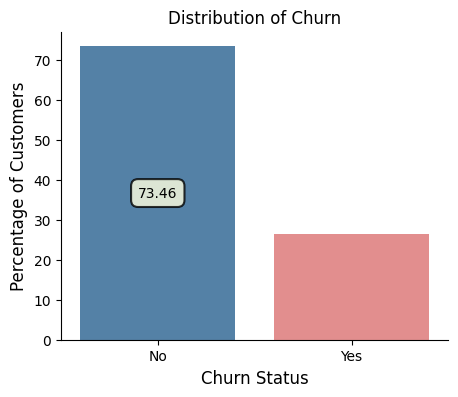

In [50]:
# we are goin to be seeing the overall churn rate
import matplotlib.pyplot as plt
import seaborn as sns

# value_counts() counts how many yes and no are in the churn column
# normalize=True returns the proportion of each value in the column
# round(4) rounds the proportion to 4 decimal places
# reset_index() converts the Series to a DataFrame with a new index
data_count = (data['Churn'].value_counts(normalize=True).round(4) * 100).reset_index(name='Percent (%)')

# bbox is a dictionary that defines the properties of the text box in the bar plot
bbox = { 'boxstyle': 'round,pad=0.5',  # Round corners + padding
    'facecolor': 'lightyellow',    # Background color
    'edgecolor': 'black',         # Border color
    'linewidth': 1.5,             # Thicker border
    'alpha': 0.8                  # Transparency (0=invisible, 1=opaque)
    }
# palette is a dictionary that defines the colors for the bars in the bar plot
palette = {'Yes':'lightcoral', 'No':'steelblue'}

# Create a bar plot using seaborn
# fig, ax = plt.subplots(1, 1, figsize=(5, 4)) creates a figure and axis for the plot
# sns.barplot() creates the bar plot with the specified data, x and y axes, and color palette
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
sns.barplot(data=data_count, x='Churn', y='Percent (%)', palette=palette)
plt.xlabel("Churn Status", fontsize=12)
plt.ylabel("Percentage of Customers", fontsize=12)
# ax.bar_label() adds labels to the bars in the plot
ax.bar_label(ax.containers[0], label_type='center', bbox=bbox)
sns.despine() 
# ax.set_title() sets the title of the plot
ax.set_title('Distribution of Churn');

C:\Users\Jason\AppData\Local\Temp\ipykernel_2212\1006383508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=senior_count, x='SeniorCitizen', y='Percent (%)',


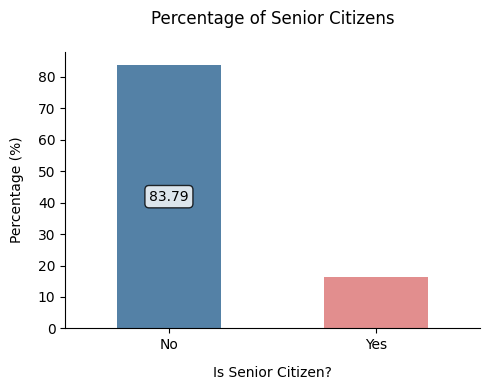

In [ ]:
# Senior Citizen Plot
senior_count = (data['SeniorCitizen'].value_counts(normalize=True).round(4) * 100).reset_index(name='Percent (%)')
senior_count['SeniorCitizen'] = senior_count['SeniorCitizen'].map({'No': 'No', 'Yes': 'Yes'})  # Convert binary to labels

plt.figure(figsize=(5, 4))
sns.barplot(data=senior_count, x='SeniorCitizen', y='Percent (%)', 
            palette={'Yes': 'lightcoral', 'No': 'steelblue'}, width=0.5)
plt.gca().bar_label(plt.gca().containers[0], label_type='center', 
                   bbox={'boxstyle': 'round', 'facecolor': 'white', 'alpha': 0.8})
plt.title('Percentage of Senior Citizens', pad=20)
plt.ylabel('Percentage (%)', labelpad=10)
plt.xlabel('Is Senior Citizen?', labelpad=10)
sns.despine()  # Remove top/right borders for cleaner look
plt.tight_layout() # Adjust layout to fit elements
plt.show()
   

<Figure size 600x400 with 0 Axes>

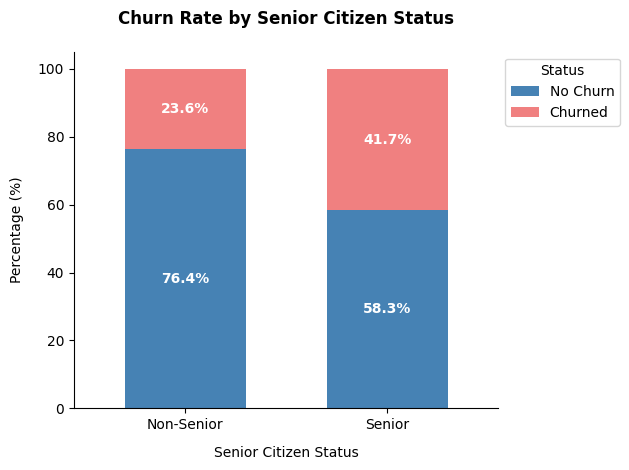

In [9]:
# Calculate percentages
senior_churn = (data.groupby(['SeniorCitizen', 'Churn'])
                .size()
                .unstack()
                .apply(lambda x: 100 * x / x.sum(), axis=1)
                .round(1))

# Plot
plt.figure(figsize=(6, 4))
senior_churn.plot(kind='bar', 
                 stacked=True, 
                 color=['steelblue', 'lightcoral'],
                 width=0.6)

# Add percentage labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, 
                      fmt='%.1f%%', 
                      label_type='center',
                      color='white',
                      fontweight='bold')

# Formatting
plt.title('Churn Rate by Senior Citizen Status', pad=20, fontweight='bold')
plt.xlabel('Senior Citizen Status', labelpad=10)
plt.ylabel('Percentage (%)', labelpad=10)
plt.xticks([0, 1], ['Non-Senior', 'Senior'], rotation=0)
sns.despine()
plt.legend(['No Churn', 'Churned'], title='Status', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



<Figure size 1000x500 with 0 Axes>

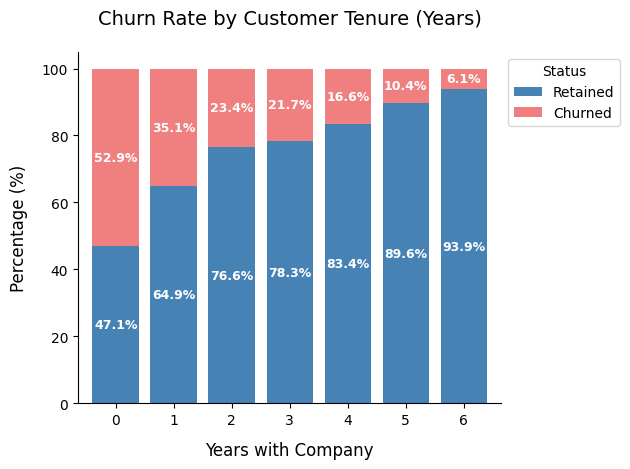

In [10]:
# First create tenure groups (in years)
data['TenureYears'] = (data['TenureMonths'] / 12).round().astype(int)

# Calculate percentages
tenure_churn = (data.groupby(['TenureYears', 'Churn'])
                .size()
                .unstack()
                .apply(lambda x: 100 * x / x.sum(), axis=1)
                .round(1))

# Plot
plt.figure(figsize=(10, 5))
tenure_churn.plot(kind='bar', 
                 stacked=True, 
                 color=['steelblue', 'lightcoral'],
                 width=0.8)

# Add percentage labels (only show if >5% for readability)
for container in plt.gca().containers:
    labels = [f'{val:.1f}%' if val > 5 else '' for val in container.datavalues]
    plt.gca().bar_label(container, 
                       labels=labels,
                       label_type='center',
                       color='white',
                       fontweight='bold',
                       fontsize=9)

# Formatting
plt.title('Churn Rate by Customer Tenure (Years)', pad=20, fontsize=14)
plt.xlabel('Years with Company', labelpad=10, fontsize=12)
plt.ylabel('Percentage (%)', labelpad=10, fontsize=12)
plt.xticks(rotation=0)
sns.despine()
plt.legend(['Retained', 'Churned'], title='Status', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [11]:
X = data.copy().drop(columns=['Churn'])
y = data['Churn'].copy()
X.head()

,City,ZipCode,Latitude,Longitude,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,TenureYears
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,2
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,4


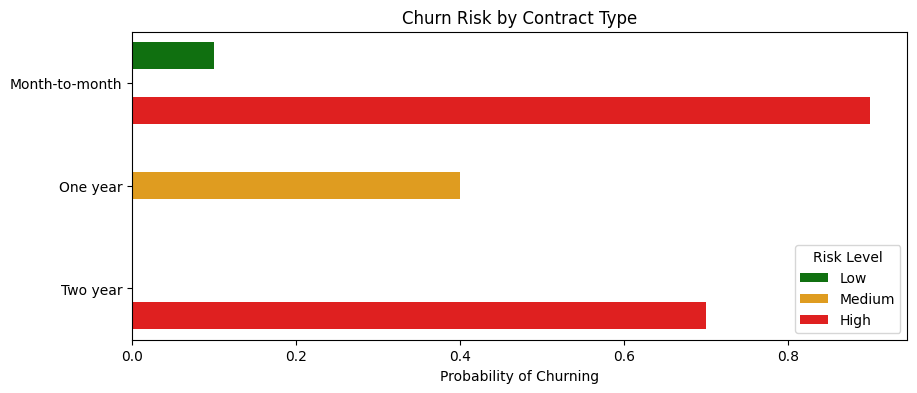

In [12]:
# Create a sample DataFrame for prediction_display
prediction_display = pd.DataFrame({
    'ChurnProbability': [0.1, 0.4, 0.7, 0.9],
    'Contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month'],
    'RiskLevel': ['Low', 'Medium', 'High', 'High']
})

# Plot individual customer risk
plt.figure(figsize=(10, 4))
sns.barplot(data=prediction_display, 
            x='ChurnProbability', 
            y='Contract', 
            hue='RiskLevel',
            palette={'Low':'green', 'Medium':'orange', 'High':'red'})
plt.title('Churn Risk by Contract Type')
plt.xlabel('Probability of Churning')
plt.ylabel('')
plt.legend(title='Risk Level')
plt.show()

<Figure size 1000x500 with 0 Axes>

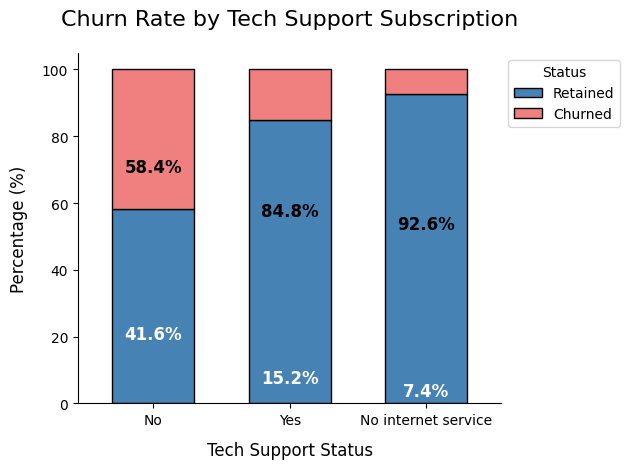

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Data preparation
tech_churn = (data.groupby(['TechSupport', 'Churn'])
              .size()
              .unstack()
              .apply(lambda x: 100*x/x.sum(), axis=1)
              .sort_values('Yes', ascending=False))

# Stacked bar plot
tech_churn.plot(kind='bar', stacked=True, 
                color=['steelblue', 'lightcoral'], 
                width=0.6, 
                edgecolor='black')

# Annotations
for i, (yes_pct, no_pct) in enumerate(zip(tech_churn['Yes'], tech_churn['No'])):
    plt.text(i, yes_pct/2, f"{yes_pct:.1f}%", 
             ha='center', va='center', 
             color='white', fontweight='bold', fontsize=12)
    plt.text(i, yes_pct + no_pct/2, f"{no_pct:.1f}%", 
             ha='center', va='center', 
             color='black', fontweight='bold', fontsize=12)

# Formatting
plt.title("Churn Rate by Tech Support Subscription", pad=20, fontsize=16)
plt.xlabel("Tech Support Status", labelpad=10, fontsize=12)
plt.ylabel("Percentage (%)", labelpad=10, fontsize=12)
plt.xticks(rotation=0)
plt.legend(['Retained', 'Churned'], title='Status', bbox_to_anchor=(1,1))
sns.despine()
plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Define feature processing
numeric_features = ['TenureMonths', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['Contract', 'TechSupport', 'PaymentMethod', 'InternetService']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Build model
churn_predictor = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
churn_predictor.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['TenureMonths',
                                                   'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Contract', 'TechSupport',
                                                   'PaymentMethod',
                                                   'InternetService'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
def predict_churn(customer_data):
    """
    Input: Dictionary of customer features
    Output: Prediction and probability
    """
    # Convert input to DataFrame
    input_df = pd.DataFrame([customer_data])
    
    # Predict
    proba = churn_predictor.predict_proba(input_df)[0][1]
    prediction = "Likely to leave" if proba >= 0.5 else "Less likely to leave"
    
    # Explain key factors
    explanation = []
    if proba >= 0.7:
        explanation.append(f"High risk ({proba:.0%} probability)")
    elif proba >= 0.5:
        explanation.append(f"Moderate risk ({proba:.0%} probability)")
    else:
        explanation.append(f"Low risk ({proba:.0%} probability)")
    
    if customer_data['Contract'] == 'Month-to-month':
        explanation.append("Month-to-month contracts churn more")
    if customer_data['TechSupport'] == 'No':
        explanation.append("Lack of tech support increases risk")
    
    return {
        'prediction': prediction,
        'probability': proba,
        'risk_factors': explanation
    }

In [54]:
# Example customer input
test_customer = {
    'TenureMonths': 1,
    'MonthlyCharges': 75.00,
    'TotalCharges': 75.00,
    'Contract': 'Month-to-month',
    'TechSupport': 'Yes',
    'PaymentMethod': 'Bank transfer (automatic)',
    'InternetService': 'Fiber optic'
}

# Get prediction
result = predict_churn(test_customer)
print(f"Prediction: {result['prediction']}")
print(f"Probability: {result['probability']:.1%}")
print("Key factors:")
for factor in result['risk_factors']:
    print(f"- {factor}")

Prediction: Less likely to leave
Probability: 38.0%
Key factors:
- Month-to-month contracts churn more


In [17]:
# Ensure that CELL INDEX 10 is executed before running this cell
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = churn_predictor.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 76.51%


In [55]:
high_risk = {
    'TenureMonths': 2,
    'MonthlyCharges': 99.99,
    'TotalCharges': 199.98,
    'Contract': 'Month-to-month',
    'TechSupport': 'No',
    'PaymentMethod': 'Electronic check',
    'InternetService': 'Fiber optic'
}
medium_risk = {
    'TenureMonths': 8,
    'MonthlyCharges': 65.50,
    'TotalCharges': 524.00,
    'Contract': 'One year',
    'TechSupport': 'No',
    'PaymentMethod': 'Mailed check',
    'InternetService': 'DSL'
}
low_risk = {
    'TenureMonths': 48,
    'MonthlyCharges': 45.00,
    'TotalCharges': 2160.00,
    'Contract': 'Two year',
    'TechSupport': 'Yes',
    'PaymentMethod': 'Credit card (automatic)',
    'InternetService': 'DSL'
}
new_customer = {
    'TenureMonths': 1,
    'MonthlyCharges': 75.00,
    'TotalCharges': 75.00,
    'Contract': 'Month-to-month',
    'TechSupport': 'Yes',
    'PaymentMethod': 'Bank transfer (automatic)',
    'InternetService': 'Fiber optic'
}
no_internet = {
    'TenureMonths': 24,
    'MonthlyCharges': 25.00,
    'TotalCharges': 600.00,
    'Contract': 'One year',
    'TechSupport': 'No internet service',
    'PaymentMethod': 'Bank transfer (automatic)',
    'InternetService': 'No'
}
cases = [high_risk, medium_risk, low_risk, new_customer, no_internet]
for customer in cases:
    result = predict_churn(customer)
    print("\n=== Scenario ===")
    print(f"Prediction: {result['prediction']}")
    print(f"Probability: {result['probability']:.0%}")
    print("Key factors:")
    for factor in result['risk_factors']:
        print(f"- {factor}")


=== Scenario ===
Prediction: Likely to leave
Probability: 73%
Key factors:
- High risk (73% probability)
- Month-to-month contracts churn more
- Lack of tech support increases risk

=== Scenario ===
Prediction: Less likely to leave
Probability: 4%
Key factors:
- Lack of tech support increases risk

=== Scenario ===
Prediction: Less likely to leave
Probability: 4%
Key factors:

=== Scenario ===
Prediction: Less likely to leave
Probability: 38%
Key factors:
- Month-to-month contracts churn more

=== Scenario ===
Prediction: Less likely to leave
Probability: 18%
Key factors:
